간격 별로 나누어 2차원 dp를 푸는 방식으로 접근한다.

처음에는 start를 고정해서 start에서 gap을 늘려가면서 접근하려고 했었다. 예를들어 start가 0이었고, gap이 2였다면 0 ~ 2, 2 ~ 5 이렇게 나누어 dp할 수있을 것이다. 하지만 이렇게 되면 문제가 2~5여기에서 start가 2가 되므로 차례로 1이 증가되는 start의 특징 상 아직 start=2인 dp는 0으로 초기화되어 있는 상태이므로 재귀로 돌려야만 진짜 start=2인 dp값을 구할 수 있다. 재귀는 dfs를 제외하고는 최대한 지양하는 것이 좋다고 생각하기 때문에 구조를 조금 바꿀 필요가 있어보인다.

따라서 아래와 같은 방식으로 접근하면 논리적 미스 없이 문제를 풀 수있다.

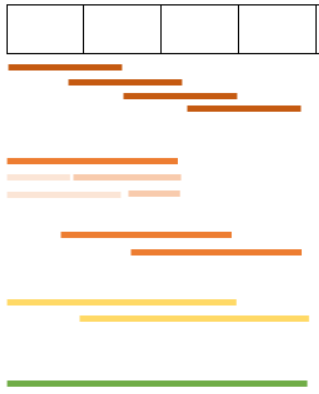

In [17]:
import math

T = int(input())
for t in range(T):
  N = int(input())
  arr = list(map(int, input().split(" ")))
  dp = [[0]*N for _ in range(N)]
  accum_sum = [0]
  for a in arr:
    accum_sum.append(accum_sum[-1]+a)

  print(accum_sum)
  for end_gap in range(1,N):
    for start in range(N-end_gap):
      end = start+end_gap
      dp[start][end]=math.inf
      for k in range(start,end):
        dp[start][end]=min(dp[start][end], dp[start][k]+dp[k+1][end]
                           +accum_sum[end+1]-accum_sum[start])
  print(dp[0][-1])

1
4
40 30 30 50
[0, 40, 70, 100, 150]
300
